# Imports

In [17]:
import numpy as np
from numpy.random import randint,choice
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from unidecode import unidecode
from scamp import *
import music21 as m21
from random import random, choice, randint

# Melodia

## Funções auxiliares

In [2]:
def maior_tamanho(palavras):
    tamanho_max = 0
    for palavra in palavras:
           if len(palavra) > tamanho_max:
                tamanho_max = len(palavra)
                
    return tamanho_max

## Extrair texto

In [3]:
bib = open('biblia.txt').read()
palavras = re.split('-|,|\n| ',bib)
palavras = list(filter(lambda x: x, palavras)) #remove ''
tamanho_max = maior_tamanho(palavras)
ocorrencias = np.zeros((26,tamanho_max)) #acomodará as ocorrências de cada par letra_inicial-tamanho, sendo o elemento i,j a palavra com a letra inicial i e tamanho j
for palavra in palavras:
    tamanho = len(palavra)
    for letra in palavra:
        letra = ord(letra.lower())-97
        if letra >-1 and letra < 26:
            ocorrencias[letra,tamanho-1]+=1
    else:
        pass

## Criar Dataframe

In [4]:
lista_alfabeto = 'a b c d e f g h i j k l m n o p q r s t u v w x y z'.split(' ')
zipf = pd.DataFrame(ocorrencias)
zipf.columns = range(1,tamanho_max+1)
zipf = zipf/zipf.sum().sum()
#Adicionar probabilidades marginais
marginais_letras = []
for row in range(len(zipf)):
    marginal_letra = zipf.iloc[row,:].sum()
    marginais_letras.append(marginal_letra)
zipf['marginais'] = marginais_letras
marginais_extensoes = pd.Series([zipf.iloc[:,col].sum() for col in range(len(zipf.columns))])
marginais_extensoes.index = zipf.columns
zipf = zipf.append(marginais_extensoes,ignore_index=True)
lista_alfabeto.append('marginais')
zipf.index = lista_alfabeto
zipf

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,marginais
a,8.803033e-03,7.140886e-03,0.008681,0.016906,0.016344,0.016899,0.015403,0.011287,0.007602,0.005830,0.003033,0.001615,0.000635,2.242415e-04,1.007362e-04,2.449408e-05,1.138457e-05,3.104883e-06,0.000000e+00,0.120545
b,0.000000e+00,3.449870e-07,0.000379,0.000732,0.002390,0.002279,0.001440,0.001059,0.000921,0.000608,0.000367,0.000131,0.000075,2.414909e-05,3.104883e-06,0.000000e+00,0.000000e+00,6.899740e-07,0.000000e+00,0.010409
c,3.449870e-07,8.624675e-06,0.001933,0.003243,0.002861,0.003849,0.003778,0.003541,0.002523,0.002129,0.001228,0.000815,0.000341,1.162606e-04,4.312337e-05,1.586940e-05,2.414909e-06,1.379948e-06,0.000000e+00,0.026427
d,0.000000e+00,1.464987e-02,0.003566,0.005600,0.005959,0.005609,0.005273,0.004250,0.002912,0.002386,0.001446,0.000864,0.000341,1.148807e-04,4.415834e-05,1.103958e-05,2.414909e-06,1.379948e-06,0.000000e+00,0.053031
e,1.307949e-02,1.715551e-02,0.017949,0.013159,0.016498,0.016995,0.012865,0.011093,0.007759,0.006630,0.003451,0.002178,0.001042,4.457232e-04,2.397660e-04,5.209304e-05,1.138457e-05,5.174805e-06,4.139844e-06,0.140613
f,0.000000e+00,8.003698e-05,0.001145,0.000849,0.002927,0.002289,0.001235,0.001018,0.000584,0.000493,0.000300,0.000196,0.000049,1.000462e-05,2.069922e-06,1.724935e-06,3.449870e-07,3.449870e-07,0.000000e+00,0.011180
g,0.000000e+00,3.449870e-07,0.000003,0.000600,0.001584,0.002059,0.001791,0.001209,0.000730,0.000489,0.000544,0.000216,0.000089,3.656862e-05,4.139844e-06,1.034961e-06,6.899740e-07,3.449870e-07,0.000000e+00,0.009357
h,0.000000e+00,3.277376e-04,0.001012,0.000845,0.003697,0.005401,0.002011,0.001131,0.000510,0.000534,0.000236,0.000121,0.000063,1.793932e-05,1.241953e-05,1.724935e-06,1.379948e-06,0.000000e+00,0.000000e+00,0.015921
i,5.864779e-06,7.613863e-04,0.004810,0.005795,0.008872,0.009269,0.007370,0.006781,0.004573,0.003535,0.002154,0.001295,0.000581,2.169968e-04,8.383184e-05,2.518405e-05,1.000462e-05,6.899740e-06,1.379948e-06,0.056148
j,0.000000e+00,2.080272e-04,0.000045,0.001012,0.001209,0.000780,0.000637,0.000437,0.000451,0.000270,0.000059,0.000021,0.000006,3.449870e-07,6.899740e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.005137


### Visualização das ocorrências

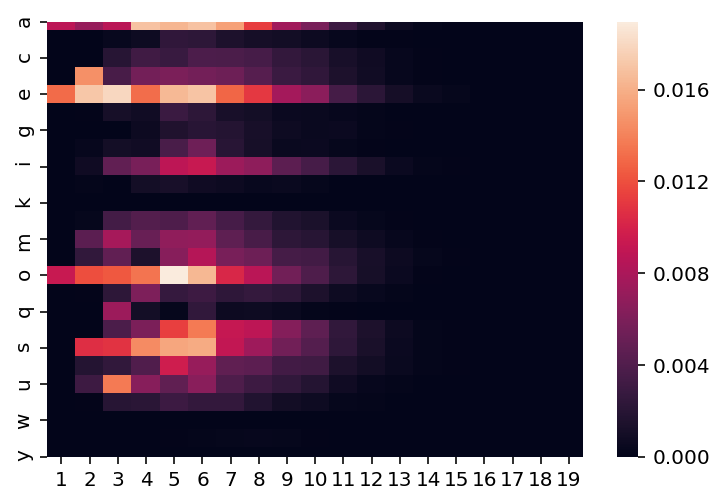

In [5]:
sns.heatmap(zipf.drop('marginais').drop('marginais',axis=1))

## Sorteio notas e extensões e convertendo novo texto para notas

In [29]:
durs = list(zipf.columns) #durações disponíveis
nota_inicial = np.random.randint(24,71) #a nota inicial mais alta possível é a 103 (G7)
escalas = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
escala = escalas[nota_inicial%12]
print('Escala de %s'%escala)
diatonica = [2,2,1,2,2,2,1]*3+[2,2,1,2]
alts = [nota_inicial+sum(diatonica[:i]) for i in range(len(diatonica))]
dic = dict(zip(zipf.index[:-1], alts))
PL = 0.05
novo_texto = open('Iliada.txt',encoding='utf-8').read()
palavras = re.split('-|,|\n| ',novo_texto)
palavras = list(filter(lambda x: x, palavras)) #remove ''

notas = []
for palavra in palavras[:120]:
    palavra = unidecode(palavra)
    tamanho = len(palavra)
    if tamanho > tamanho_max:
        notas.append(0)
    else:
        for letra in palavra:
            letra = ord(letra.lower())-97
            if letra > 0 and letra < 26:
                
                prob = zipf.iloc[letra,tamanho-1]/zipf.iloc[-1,tamanho-1]
                if prob > PL:
                    notas.append(dic[chr(letra+97)])
                else:
                    notas.append(0)
            else:
                pass
notas = np.array(notas)
notas

Escala de C#


array([68,  0, 66,  0, 51,  0, 68,  0, 61, 68,  0, 66, 51,  0, 61, 66,  0,
       51, 61, 68, 42,  0, 51, 70, 44, 66, 70,  0, 66, 44,  0, 66, 61,  0,
       44, 51, 51,  0, 51,  0, 44, 61,  0, 51, 68, 68, 44, 51, 51,  0,  0,
        0, 61, 60, 68, 44, 66,  0,  0,  0, 61,  0, 61, 61, 68, 44, 72,  0,
       66, 44, 68,  0, 61, 66,  0, 66, 51,  0, 51, 70, 51,  0, 61,  0, 61,
        0, 61, 68, 44, 61, 68,  0, 51,  0, 44, 60, 51, 61, 68,  0,  0, 51,
       70, 61,  0, 61,  0,  0, 44, 42, 44, 61,  0,  0, 68,  0, 66,  0,  0,
       44, 68, 61,  0, 66, 51,  0,  0, 61, 68, 61,  0, 61, 60, 70, 66, 51,
        0,  0, 51, 68, 68, 44,  0, 63, 66, 44,  0,  0,  0, 66,  0,  0, 44,
       68,  0, 44,  0, 44,  0, 51, 60, 70, 66, 51, 60, 68, 44,  0, 44, 60,
        0,  0, 44, 66, 51,  0, 51,  0,  0, 51, 61, 70, 44,  0, 68, 61, 65,
       72, 44, 68, 44,  0, 44, 58, 44, 68,  0, 66, 51,  0, 61, 68, 61,  0,
       66, 44, 44, 68, 68, 44, 68,  0, 61, 44,  0, 68,  0, 61,  0,  0, 68,
       70,  0, 44, 60, 70

# Harmonia

## Funções

In [7]:
def vial(pitch):
    t = [(pitch + 3 * x) for x in range(4)]
    s = [(pitch + 5 + 3 * x) for x in range(4)]
    d = [(pitch + 7 + 3 * x) for x in range(4)]
    return t, s, d


def major(pitch):
    return [pitch, (pitch + 4), (pitch + 7)]

def minor(pitch):
    return [pitch, (pitch + 3), (pitch + 7)]

def major_or_minor(pitch):
    rand = random()
    if rand < 0.5:
        return major(pitch)
    else:
        return minor(pitch)


def vial_system(num):
    count = 0
    start_pitch = choice(pitches)
    tonic, sub, dom = vial(start_pitch)
    modes = [tonic, sub, dom]
    result = []
    
    while count < num:
        i = 0
        while i < 3:
            pitch = choice(modes[i])
            mode = major_or_minor(pitch)
            result.append(mode)
            i += 1
            if count == num - 1:
                if i == 2:
                    rand = random()
                    if rand > 0.5:
                        i += 1
        count += 1
    return result


 ## Gerar acordes

In [8]:
pitches = list(range(48, 60))

acordes = vial_system((len(notas)//4)//3) #1 acorde para cada 4 notas da melodia

# Gravar Música

In [30]:
score = m21.stream.Score()
melodia = m21.stream.Part()
harmonia = m21.stream.Part()
duracao_semicolcheia = 1/4
acordes_usados = 0 #contabiliza quantos acordes ja foram usados
acorde_sera = choice([2,3,4])  #contabiliza o numero de casas para o prox acorde
for nota in notas:  
    if nota == 0:
        alt = m21.note.Rest()
    else:
        alt = m21.note.Note(nota)

    alt.quarterLength = duracao_semicolcheia
    melodia.append(alt)
    if acorde_sera == 0 and acordes_usados < len(acordes)-1:
        acorde = m21.chord.Chord(acordes[acordes_usados])
        acorde.quarterLength = choice([1,2,3])
        harmonia.append(acorde)
        acordes_usados += 1
        acorde_sera = choice([2,3,4])
    acorde_sera -= 1
score.append(melodia)
score.append(harmonia)

score.show("musicxml")